In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
teacher_db = pd.read_csv('tae.data')

In [3]:
teacher_db.shape

(150, 6)

In [4]:
teacher_db.head()

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [5]:
teacher_db.tail()

,1,23,3,1.1,19,3.1
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1
149,2,2,10,2,27,1


In [6]:
teacher_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       150 non-null    int64
 1   23      150 non-null    int64
 2   3       150 non-null    int64
 3   1.1     150 non-null    int64
 4   19      150 non-null    int64
 5   3.1     150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [7]:
teacher_db.describe()

,1,23,3,1.1,19,3.1
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.813333,13.580000,8.140000,1.853333,27.926667,2.013333
std,0.390949,6.805318,7.034937,0.354958,12.916405,0.819123
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.500000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [8]:
# Renaming the first columns of our data frame
teacher_db.rename(columns = {'1' : 'Language', '23' : 'Instructor', 
                             '3' : 'Course', '1.1' : 'Term', '19' : 'Class-size', 
                             '3.1' : 'Class-attribute'}, 
                  inplace = True)

In [9]:
teacher_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Language         150 non-null    int64
 1   Instructor       150 non-null    int64
 2   Course           150 non-null    int64
 3   Term             150 non-null    int64
 4   Class-size       150 non-null    int64
 5   Class-attribute  150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [10]:
teacher_db.head()

,Language,Instructor,Course,Term,Class-size,Class-attribute
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


<AxesSubplot:xlabel='Course', ylabel='Count'>

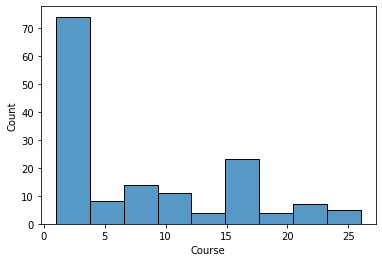

In [11]:
sns.histplot(teacher_db.Course)

<AxesSubplot:title={'center':'Instructors who are native English speakers'}, xlabel='Instructor', ylabel='Count'>

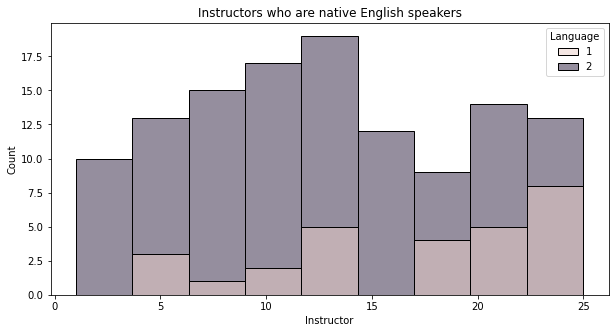

In [12]:
plt.figure(figsize = (10, 5))
plt.title('Instructors who are native English speakers')
sns.histplot(x = 'Instructor', hue = 'Language', data = teacher_db)

There is no need to convert any categorical data into numerical data type because it has been done already in our chosen dataset

Since in the classification, we aim to predict the class label of a sample (output or y)
based on its features (input or X). So, in the first step, we should slice our data
into input and output.

In [13]:
x = teacher_db.drop('Class-attribute', axis = 1)
y = teacher_db['Class-attribute'] - 1

In [14]:
x = teacher_db.iloc[:, [1, 2, 3, 4]].values
y = teacher_db.iloc[:, 5].values

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.1, random_state = 0)

Scaling the data set using StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.transform(x_test)

In [17]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train_s, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
# Testing our model by running our test data with it (Predicting the test set results)
y_pred = classifier.predict(x_test_s)
print(y_pred)

[1 2 1 3 3 3 3 3 2 1 1 3 1 2 2]


In [19]:
print(y_test)

[1 2 1 1 3 2 3 3 1 1 2 3 1 2 2]


In [20]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('---------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.73


Confusion Matrix:
[[4 1 1]
 [1 3 1]
 [0 0 4]] 


---------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           1       0.80      0.67      0.73         6
           2       0.75      0.60      0.67         5
           3       0.67      1.00      0.80         4

    accuracy                           0.73        15
   macro avg       0.74      0.76      0.73        15
weighted avg       0.75      0.73      0.73        15



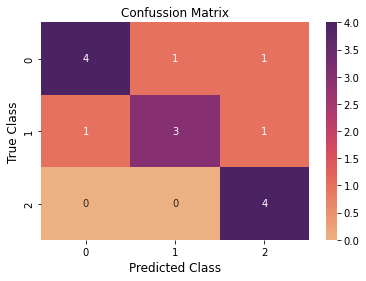

In [21]:
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')

plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title('Confussion Matrix', fontsize = 12)

plt.show()